# **Cycle Analyzer**

### Importing the required packages

In [1]:
import pandas as pd 
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Plotting my application cycle

In [2]:
# Setting the main file directory
main_dir = "C:/Users/TooFastDan/Documents/MD_PhD Application/Cycle Analyzer"

In [28]:
# Importing the excel doc and processing it
dan = pd.read_excel(main_dir+"/Dan's Application Cycle.xlsx")

# Getting the actions (column) names and melting the df into a favorable format
column_names = list(dan.columns)
column_names = [s.lower() for s in column_names]
dan.columns = column_names
column_names.remove("schools")
dan = dan.melt(id_vars="schools", value_vars=column_names, var_name="Actions", value_name="Dates")
dan["Dates"] = pd.to_datetime(dan["Dates"])

# Grouping by application actions and sorting by date
dan_gb1 = dan.groupby("Actions")
dan_sort_list1 = []
for name, group in dan_gb1:
    group = group.sort_values("Dates", ascending=True)
    dan_sort_list1.append(group)
dan_sort1 = pd.concat(dan_sort_list1, axis=0).reset_index(drop=True)

# Ranking the events by date, ignoring dates that are not present
numbers = []
for action in dan_sort1["Actions"].unique():
    n = 0
    df = dan_sort1[dan_sort1["Actions"]==action]
    for d in df["Dates"]:
        if pd.isnull(d):
            n = n
            numbers.append(n)
        else:
            n = n + 1
            numbers.append(n)
dan_sort1["tracker"] = numbers

# Adding the start date of the cycle and the current date and sorting
start = datetime.datetime(2021, 5, 28)  #AMCAS primary submission
start = pd.to_datetime(start)
now = datetime.datetime.now()  #current date 
now = now.strftime("%m/%d/%Y %H:%M:%S")
now = pd.to_datetime(now)
dan_gb2 = dan_sort1.groupby("Actions")
dan_sort_list2 = []
for name, group in dan_gb2:
    df1 = {"schools":"Start", "Actions":group["Actions"].unique()[0], "Dates":start, "tracker":0}
    df2 = {"schools":"End", "Actions":group["Actions"].unique()[0], "Dates":now, "tracker":np.max(group["tracker"])}
    group = group.append([df1, df2], ignore_index=True)
    group = group.sort_values("Dates", ascending=True)
    dan_sort_list2.append(group)
dan_sort2 = pd.concat(dan_sort_list2, axis=0).reset_index(drop=True)

# Displaying the finalized df and optionally exporting to excel
display(dan_sort2)
#dan_sort2.to_excel(main_dir+"/Dan's Application Cycle Processed.xlsx", index=False)

,schools,Actions,Dates,tracker
0,Start,acceptance,2021-05-28 00:00:00,0
1,University of Iowa,acceptance,2021-12-01 00:00:00,1
2,Baylor,acceptance,2021-12-23 00:00:00,2
3,End,acceptance,2022-01-17 17:16:07,2
4,Harvard,acceptance,NaT,2
...,...,...,...,...
243,University of Wisconsin,withdraw,NaT,0
244,Stony Brook,withdraw,NaT,0
245,University of Pittsburgh,withdraw,NaT,0
246,University of Iowa,withdraw,NaT,0


### Plotting the Application Cycle as a line graph

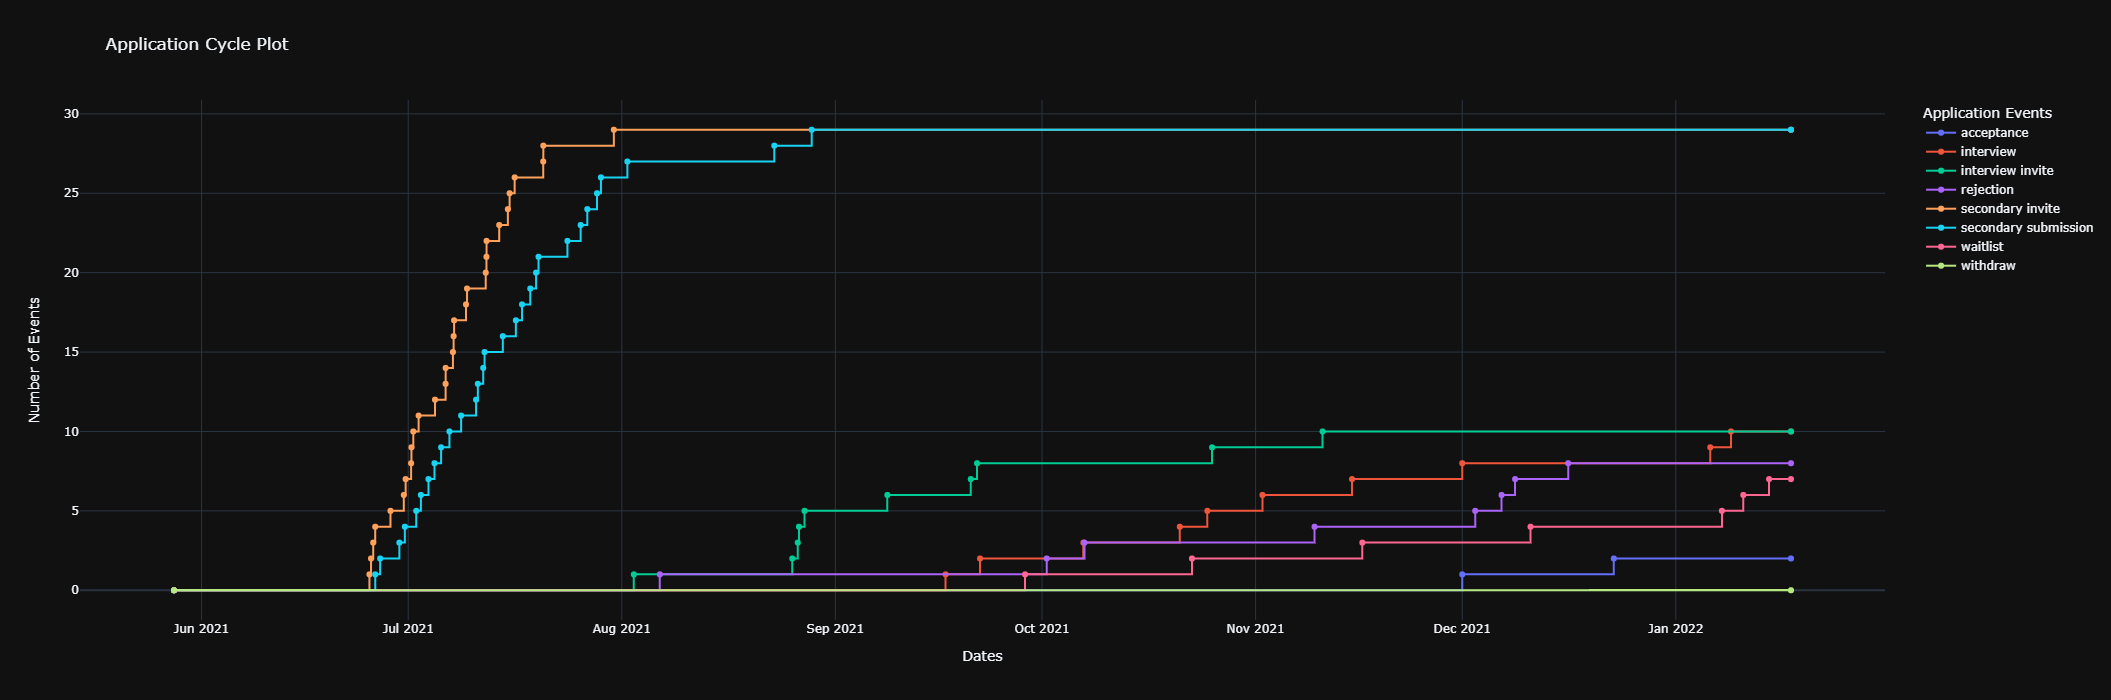

In [27]:
fig = px.line(dan_sort2, x="Dates", y="tracker", color="Actions", 
              hover_data=["schools", "Actions", "Dates"], markers=True, line_shape="hv", 
              labels={
                  "Dates": "Dates",
                  "tracker": "Number of Events",
                  "Actions": "Application Events"
              },
              title="Application Cycle Plot", 
              template="plotly_dark", width=1200, height=700)
fig.show()

In [9]:
?px.line

Signature:
px.line(
    data_frame=None,
    x=None,
    y=None,
    line_group=None,
    color=None,
    line_dash=None,
    symbol=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    line_dash_sequence=None,
    line_dash_map=None,
    symbol_sequence=None,
    symbol_map=None,
    markers=False,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    line_shape=None,
    render_mode='auto',
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a 2D line plot, each row of `data_frame` is represented as vertex of
    a pol